In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 7
# rcParams['pdf.fonttype'] = 42
# rcParams['ps.fonttype'] = 42
# rcParams['svg.fonttype'] = 'none'


path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [2]:
# Only record build and update in dynamic

library_size = 1_000_000
ion_mode = [-1, 1]
added_size=1_000_000
extend_fold=[1.5, 2, 3]
step="update"

In [3]:
import matplotlib.ticker as ticker


df=[]
for charge in ion_mode:
    for fold in extend_fold:
        data={"library_number":library_size,"add_size":added_size, "step":step, "extend_fold":fold, "charge":charge}
                
        path_benchmark_specific_data_dynamic=path_benchmark_data/f"dynamic_fast_update_{charge}_{added_size}_added_to_{library_size}_memory_usage_{step}_step_options_{fold}_fold.txt"
                    
        with open(path_benchmark_specific_data_dynamic,"r") as f1:
            for line in f1.readlines():
                items=line.split(":", maxsplit=1)
                key, value=items
                if key.strip()=="Maximum resident set size (kbytes)":
                    dynamic=int(value.strip())

            data["dynamic_entropy_search(fast_update_mode)"]=dynamic/1048576
        
            df.append(pd.DataFrame([data]))
                
df=pd.concat(df)
df

,library_number,add_size,step,extend_fold,charge,dynamic_entropy_search(fast_update_mode)
0,1000000,1000000,update,1.5,-1,3.912628
0,1000000,1000000,update,2.0,-1,3.907516
0,1000000,1000000,update,3.0,-1,3.908119
0,1000000,1000000,update,1.5,1,6.713444
0,1000000,1000000,update,2.0,1,6.728794
0,1000000,1000000,update,3.0,1,6.735119


In [4]:
     
df_data = df[["extend_fold", 
              "charge",
            "dynamic_entropy_search(fast_update_mode)", 
]]
    
df_melted=df_data.melt(id_vars=["charge", "extend_fold"], var_name="type", value_name="memory_usage")
df_melted


,charge,extend_fold,type,memory_usage
0,-1,1.5,dynamic_entropy_search(fast_update_mode),3.912628
1,-1,2.0,dynamic_entropy_search(fast_update_mode),3.907516
2,-1,3.0,dynamic_entropy_search(fast_update_mode),3.908119
3,1,1.5,dynamic_entropy_search(fast_update_mode),6.713444
4,1,2.0,dynamic_entropy_search(fast_update_mode),6.728794
5,1,3.0,dynamic_entropy_search(fast_update_mode),6.735119


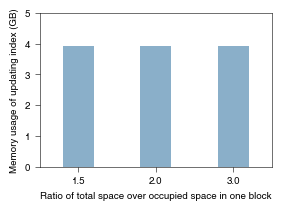

In [5]:
charge=-1
df_charge=df_melted[df_melted["charge"]==charge]
# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    }
plt.subplots(figsize=(3, 2))
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.4)  

ax.tick_params(axis='both', 
               which='both',
               width=0.4,
               )
sns.barplot(x="extend_fold", y="memory_usage", hue="type", data=df_charge, palette=color_palette,
                    legend=False, width=0.4)

        
plt.ylim(top=5)


# Set y-axis title
plt.ylabel(f"Memory usage of updating index (GB)")
    
if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"Ratio of total space over occupied space in one block")



# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search \n(fast update mode)", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))

# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"memory_usage_different_fold_{step}_step_{charge}options_extend_fold.svg", bbox_inches="tight", dpi=1200)

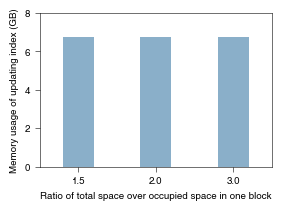

In [6]:
charge=1
df_charge=df_melted[df_melted["charge"]==charge]
# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    }
plt.subplots(figsize=(3, 2))
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.4)  

ax.tick_params(axis='both', 
               which='both',
               width=0.4,
               )
sns.barplot(x="extend_fold", y="memory_usage", hue="type", data=df_charge, palette=color_palette,
                    legend=False, width=0.4)

        
plt.ylim(top=8)


# Set y-axis title
plt.ylabel(f"Memory usage of updating index (GB)")
    

if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"Ratio of total space over occupied space in one block")

    # Change legend
    # handles, labels = ax.get_legend_handles_labels()
    # legend_dict = {l: h for h, l in zip(handles, labels)}
    # labels_new = ["Dynamic Entropy Search \n(fast update mode)", "Flash Entropy Search", "MASST+"]
    # handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
    # ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
    # Move legend to the top
    # ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"memory_usage_different_fold_{step}_step_{charge}options_extend_fold.svg", bbox_inches="tight", dpi=1200)